In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [2]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_gbnsr6.pkl', 'rb')     
gbnsr6 = pickle.load(dbfile)
dbfile.close()

In [3]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmpbsa.pkl', 'rb')     
mmpbsa = pickle.load(dbfile)
dbfile.close()

In [4]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmgbsa.pkl', 'rb')     
mmgbsa_5 = pickle.load(dbfile)
dbfile.close()

In [5]:
dbfile = open('all4_mmgbsa_igb_2.pkl', 'rb')     
mmgbsa_2 = pickle.load(dbfile)
dbfile.close()

In [6]:
gbnsr6_time = pickle.load(open('gbnsr6_frame_times.pkl', 'rb'))
mmgbsa_time = pickle.load(open('mmgbsa_frame_times.pkl', 'rb'))
mmpbsa_time = pickle.load(open('mmpbsa_frame_times.pkl', 'rb'))

In [7]:
for i in range(len(gbnsr6)):
    gbnsr6[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] = gbnsr6[i]['complex_EGB'] - \
        (gbnsr6[i]['receptor_EGB'] + gbnsr6[i]['ligand_EGB'])

In [8]:
colm = 'Differences (Complex - Receptor - Ligand)_DELTA TOTAL'

# TODO
## add igb 2

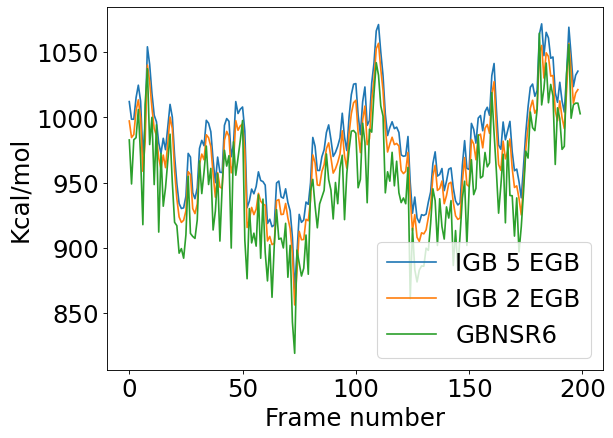

In [11]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_5], label='IGB 5 EGB')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2], label='IGB 2 EGB')
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6')
plt.xlabel('Frame number')
plt.ylabel('Kcal/mol')
plt.legend()

In [ ]:
## RMSE
gbnsr6_rmse = []

# TODO
## RMSE
## numerical evaluation
## enlarge figures
## add total (need clarification for the point of error)
## add performance check
## add ras raf mutation
## create slides

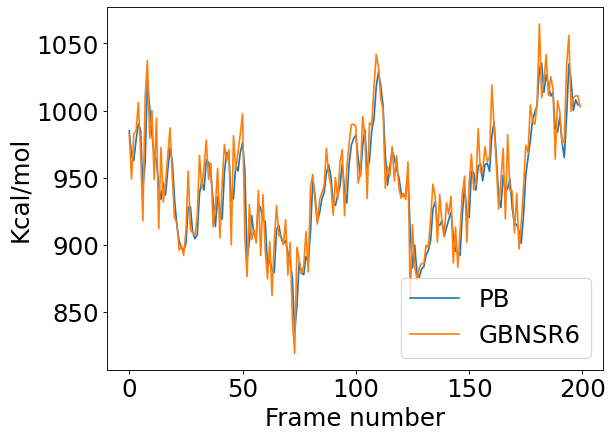

In [12]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='PB')
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6')
plt.xlabel('Frame number')
plt.ylabel('Kcal/mol')
plt.legend()

In [ ]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] for x in mmpbsa], label='PB')
plt.plot([mmgbsa[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] - \
          mmgbsa[i]['Differences (Complex - Receptor - Ligand)_EGB'] + gbnsr6[i][colm] for i in range(len(mmgbsa))], label='GBNSR6')

# TODO
## RMSE
## numerical evaluation
## enlarge figures
## add total (need clarification for the point of error)
## add performance check
## add ras raf mutation
## create slides

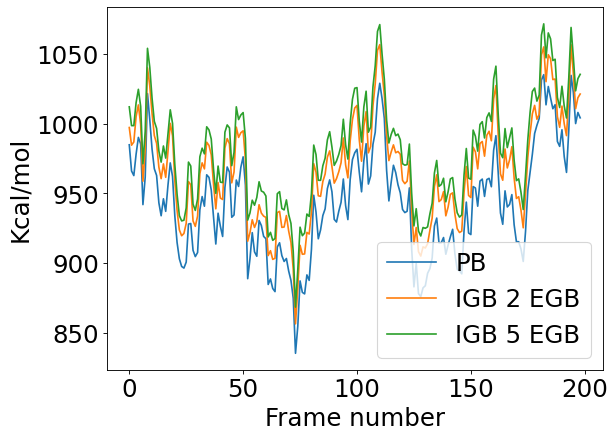

In [13]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='PB')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2], label='IGB 2 EGB')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_5], label='IGB 5 EGB')
plt.xlabel('Frame number')
plt.ylabel('Kcal/mol')
plt.legend()

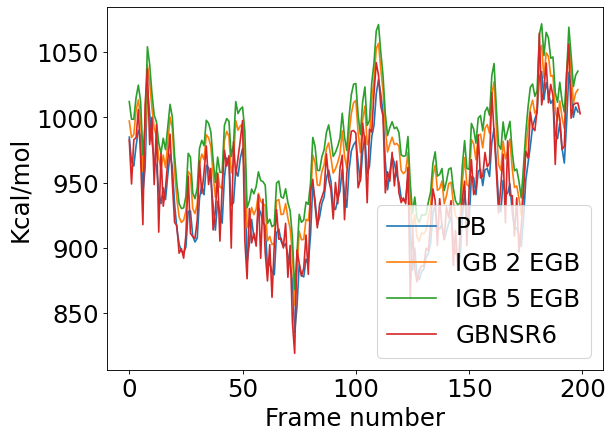

In [14]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='PB')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2], label='IGB 2 EGB')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_5], label='IGB 5 EGB')
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6')
plt.xlabel('Frame number')
plt.ylabel('Kcal/mol')
plt.legend()

In [ ]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] for x in mmpbsa], label='PB')
plt.plot([mmgbsa[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] - \
          mmgbsa[i]['Differences (Complex - Receptor - Ligand)_EGB'] + gbnsr6[i][colm] for i in range(len(mmgbsa))], label='GBNSR6')

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='Poisson Boltzman')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa], label='IGB 5 EGB')
plt.xlabel('Frame number')
plt.ylabel('Kcal/mol')
plt.legend()

In [ ]:
figure(figsize=(8, 6), dpi=80)
mmpbsa_epb = np.array([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa])
gbnsr6_egb = np.array([x[colm] for x in gbnsr6])
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([gbnsr6_egb[:i].mean() for i in range(1, len(gbnsr6_egb))], label='GBNSR6')
plt.xlabel('Avg frames up to i')
plt.ylabel('EGB or EPB')
plt.legend()

In [ ]:
figure(figsize=(8, 6), dpi=80)
mmgbsa_epb = np.array([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa])
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([mmgbsa_epb[:i].mean() for i in range(1, len(mmgbsa_epb))], label='IGB 5 EGB')
plt.xlabel('Avg frames up to i')
plt.ylabel('Kcal/mol')
plt.legend()

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([mmgbsa_epb[:i].mean() for i in range(1, len(mmgbsa_epb))], label='IGB 5 EGB')
plt.plot([gbnsr6_egb[:i].mean() for i in range(1, len(gbnsr6_egb))], label='GBNSR6')
plt.xlabel('Avg frames up to i')
plt.ylabel('Kcal/mol')
plt.legend()

In [ ]:
gbnsr6_acc = []
for i in range(len(gbnsr6)):
    new_dict = {}
    for kp in gbnsr6[0].keys():
        if kp == 'meta':
            continue
        k = kp
        k = k.replace('EELEC', 'EEL')
        k = k.replace('complex', 'Complex').replace('receptor', 'Receptor').replace('ligand', 'Ligand')
        new_dict[k] = np.array([gbnsr6[j][kp] for j in range(i + 1)]).mean()
    gbnsr6_acc.append(new_dict)

In [ ]:
# Timing comparison

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(gbnsr6_time, label='GBNSR6')
plt.plot(mmgbsa_time, label='IGB 5')
plt.plot(mmpbsa_time, label='PB')
plt.xlabel('Frame number')
plt.ylabel('Seconds')
plt.legend()

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot(np.array(gbnsr6_time)[:199] + np.array(mmgbsa_time), label='GBNSR6 + IGB 5')
plt.plot(mmpbsa_time, label='PB')
plt.xlabel('Frame number')
plt.ylabel('Seconds')
plt.legend()

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot([np.sum(gbnsr6_time[:i]) for i in range(len(gbnsr6_time))], label='GBNSR6')
plt.plot([np.sum(mmgbsa_time[:i]) for i in range(len(mmgbsa_time))], label='IGB 5')
plt.plot([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))], label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Seconds')
plt.legend()

In [ ]:
gbnsr6_time_np = np.array(gbnsr6_time)
mmgbsa_time_np = np.array(mmgbsa_time)

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot([np.sum(gbnsr6_time_np[:i] + mmgbsa_time_np[:i]) for i in range(len(gbnsr6_time))], label='GBNSR6 + IGB 5')
plt.plot([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))], label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Seconds')
plt.legend()

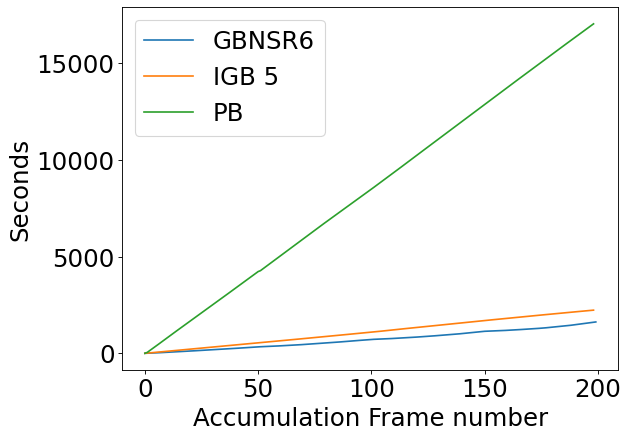

In [22]:
figure(figsize=(8, 6), dpi=80)
plt.plot([np.sum(gbnsr6_time[:i]) for i in range(len(gbnsr6_time))], label='GBNSR6')
plt.plot([np.sum(mmgbsa_time[:i]) for i in range(len(mmgbsa_time))], label='IGB 5')
plt.plot([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))], label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Seconds')
plt.legend()

In [23]:
gbnsr6_time_np = np.array(gbnsr6_time)
mmgbsa_time_np = np.array(mmgbsa_time)

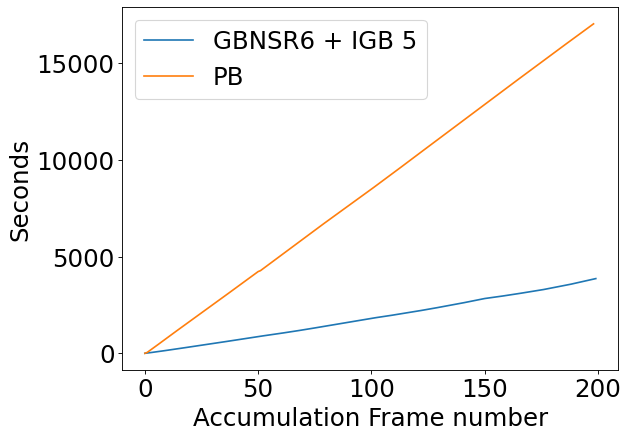

In [24]:
figure(figsize=(8, 6), dpi=80)
plt.plot([np.sum(gbnsr6_time_np[:i] + mmgbsa_time_np[:i]) for i in range(len(gbnsr6_time))], label='GBNSR6 + IGB 5')
plt.plot([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))], label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Seconds')
plt.legend()